# **W13 G2- Vizualizing ICA Components**

**Agenda.**



**1.   Recap ICA components**

**2.   Examples of ICA components visulization**



**1. Recap ICA**

**What is Independent Component Analysis (ICA)?**

Core Idea: A computational method for separating a multivariate signal into additive, statistically independent, non-Gaussian components.


**Contrast with PCA**

- **PCA**: Finds components that **are uncorrelated and maximize variance**. It's about compression and redundancy removal. Components are orthogonal.
- **ICA**: Finds components that are **statistically independent and non-Gaussian**. It's about source separation and interpretation. Components are not necessarily orthogonal.

**Preprocessing Steps (CRITICAL for ICA)**

**1.	Centering:** Subtract the mean from each variable to make its mean zero.

**2.	Whitening (via PCA):** Transform the data so that the components are uncorrelated and have unit variance. This simplifies the ICA problem. scikit-learn's FastICA does this automatically.



**2. Examples of ICA components visulization**

Note the limits on x-axis for Noise plot


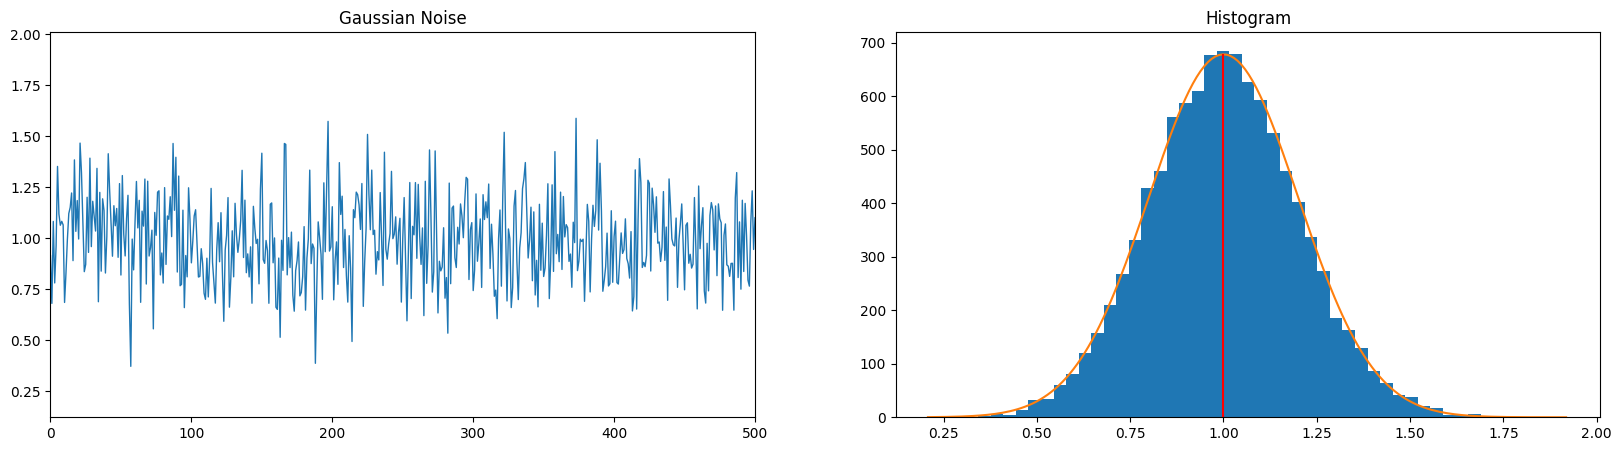

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
n_bins = 51
mean = 1
std_deviation = 0.2
shape = (10000,)
gaussian_noise = gaussian_noise = np.random.normal(mean, std_deviation, shape)

fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(gaussian_noise, linewidth = 1)
ax[0].set_xlim([0, 500])
ax[0].set_title('Gaussian Noise')

c,b ,_= ax[1].hist(gaussian_noise, n_bins)
ax[1].set_title('Histogram')
t_hist = np.arange(np.min(gaussian_noise), np.max(gaussian_noise), 0.01)

def gauss(x,std, mu):
  return 1/(std*(2*np.pi)**0.5)*np.exp(-(x-mu)**2/(2*std**2))
idx = int(n_bins/2-1)
ax[1].plot(t_hist, c[idx]*std_deviation*(2*np.pi)**0.5*gauss(t_hist, std_deviation, mean))
ax[1].vlines(mean, 0, c[idx], color='r')

print("Note the limits on x-axis for Noise plot")
plt.show()



Note the limits on x-axis for Noise plot


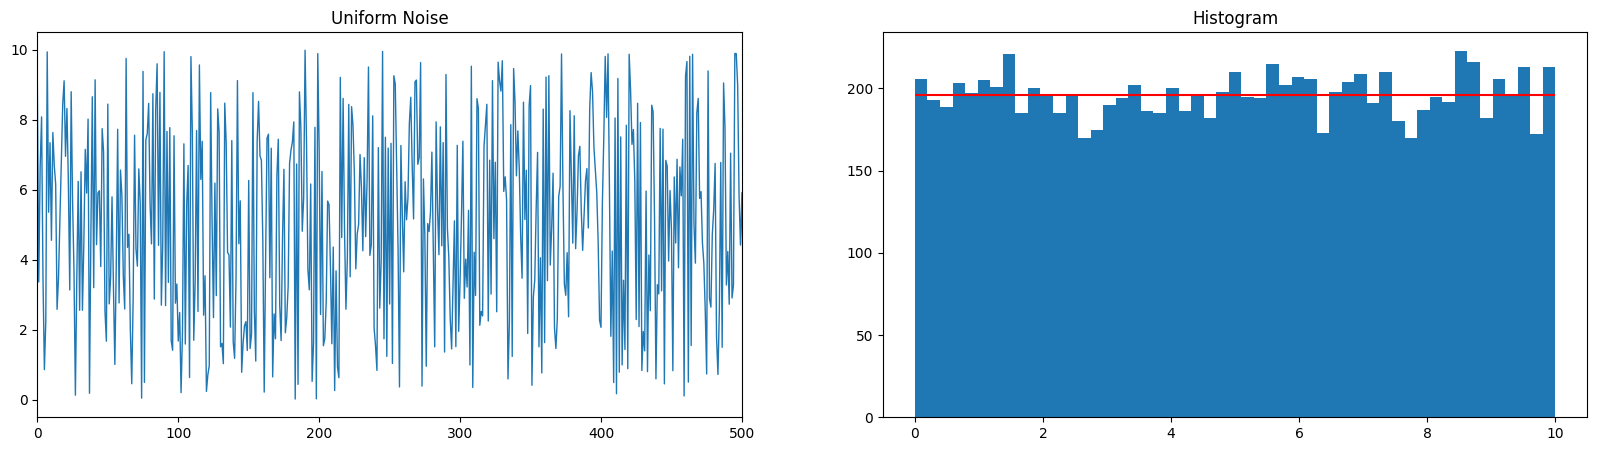

In [ ]:
uniform_array = np.random.uniform(low=0.0, high=10.0, size=10000)
#print(f"Array of uniform random numbers: {uniform_array}")

fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(uniform_array, linewidth = 1)
ax[0].set_xlim([0, 500])
ax[0].set_title("Uniform Noise")

c,b ,_= ax[1].hist(uniform_array, n_bins)


ax[1].set_title('Histogram')
ax[1].hlines(np.mean(c), 0, 10, color='r')

print("Note the limits on x-axis for Noise plot")
plt.show()

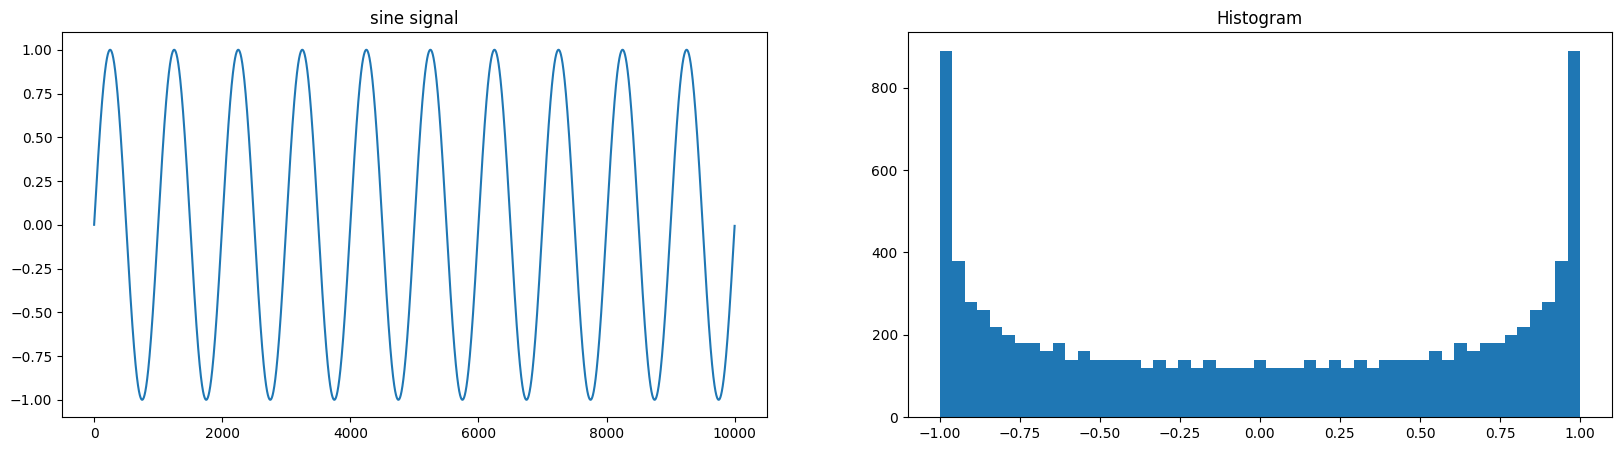

In [ ]:
t = np.arange(10000)
signal = np.sin(2 * np.pi * t * 0.001)


fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(signal)
ax[0].set_title("sine signal")

ax[1].hist(signal, n_bins)
ax[1].set_title('Histogram')
plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data = [go.Scatter3d(x = gaussian_noise, y = uniform_array, z = signal, mode = 'markers', marker = dict(
    size = 2, color = 'red',
    opacity = 0.8
))])

fig.update_layout(
    scene=dict(
        xaxis_title='Gaussian Noise',
        yaxis_title='Uniform Array',
        zaxis_title='Signal(Sinusiodal)'
    ),
    width=900,  # Increase figure width
    height=700  # Increase figure height
)

fig.show()

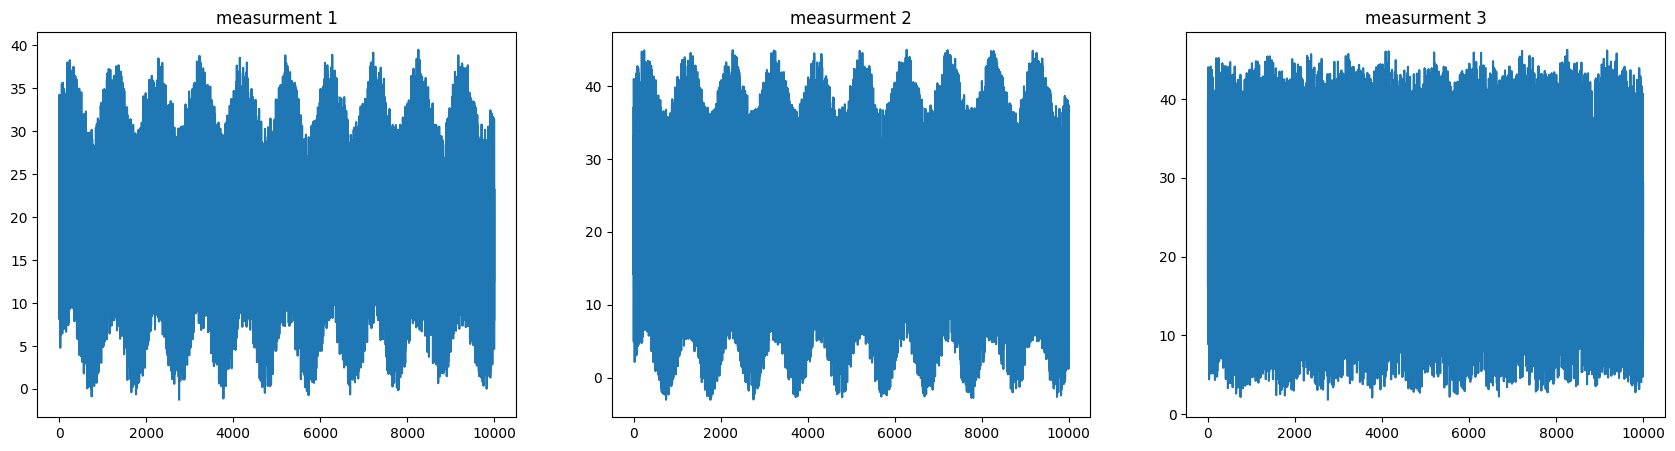

In [ ]:

while True:
    A = np.random.randint(1, 5, (3, 3))
    if np.linalg.matrix_rank(A) == 3:
        break


x = A @ np.array([gaussian_noise, uniform_array, signal])


fig, ax = plt.subplots(1,3, figsize=(21,5))

ax[0].plot(x[0])
ax[0].set_title("measurment 1")

ax[1].plot(x[1])
ax[1].set_title("measurment 2")

ax[2].plot(x[2])
ax[2].set_title("measurment 3")

plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data = [go.Scatter3d(x = x[0], y = x[1], z = x[2], mode = 'markers', marker = dict(
    size = 2, color = 'blue',
    opacity = 0.8
))])

fig.update_layout(
    scene=dict(
        xaxis_title='Measurment 1',
        yaxis_title='Measurment 2',
        zaxis_title='Measurment 3'
    ),
    width=1200,  # Increase figure width
    height=900  # Increase figure height
)

fig.show()

(3, 10000)


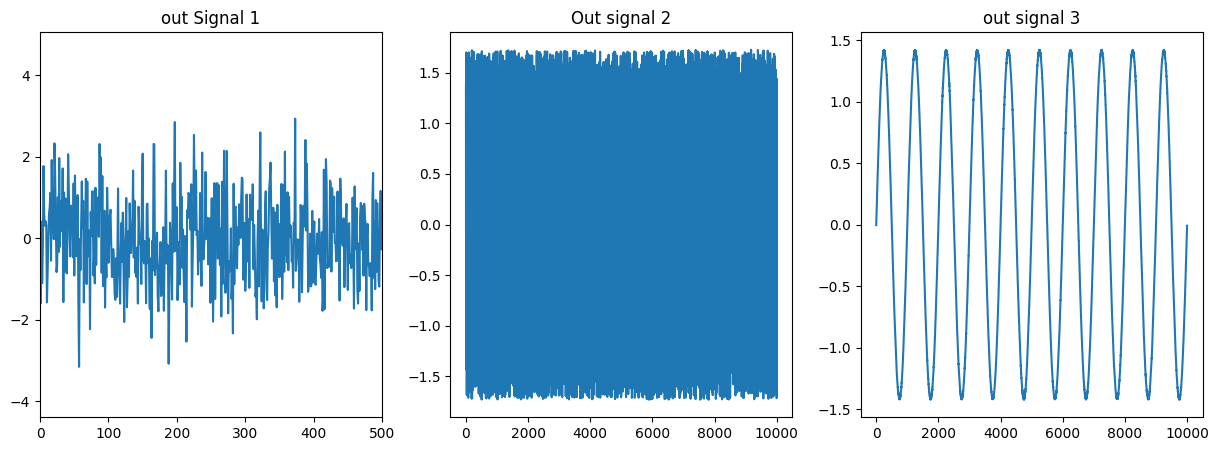

In [ ]:
from sklearn.decomposition import PCA, FastICA

ica = FastICA(n_components = 3)
S_ = ica.fit_transform(x.T).T
print(S_.shape)


fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(S_[0])
ax[0].set_title("out Signal 1")
ax[0].set_xlim([0, 500])

ax[1].plot(S_[1])
ax[1].set_title("Out signal 2")

ax[2].plot(S_[2])
ax[2].set_title("out signal 3")

plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data = [go.Scatter3d(x = S_[0], y = S_[1], z = S_[2], mode = 'markers', marker = dict(
    size = 2, color = 'blue',
    opacity = 0.8
))])

fig.update_layout(
    scene=dict(
        xaxis_title='Measurment 1',
        yaxis_title='Measurment 2',
        zaxis_title='Measurment 3'
    ),
    width=1200,  # Increase figure width
    height=900  # Increase figure height
)

fig.show()